In [4]:
import pickle
import numpy as np
import torch
import warnings
from functools import reduce
import operator
import matplotlib.pyplot as plt
import torch.nn as nn
import os
from plot_nivel_tanque import plot_nivel_tanque

from method import NNSolver

torch.xpu.is_available()
warnings.filterwarnings("ignore")

data_path = os.path.join("datasets", "dc_wss", "dc_wss_dataset_dc5_ex500")

with open(data_path, "rb") as f:
    data = pickle.load(f)

file_name = "model_2025-04-15_13-03-14_dc5_samples100_epochs15_softWeight10.pt"

file_path = os.path.join("models", file_name)
samples = int(file_name.split("samples")[1].split("_")[0])
epochs = int(file_name.split("epochs")[1].split("_")[0])

############################################################################

args = {
    "probType": "dc_wss",
    "hiddenSize": 200,
    "useCompl": False,
    "corrMode": "full",
    "qtySamples": samples,
    "epochs": epochs,
}

newModel = NNSolver(data, args)

newModel.load_state_dict(torch.load(file_path, map_location=torch.device("cpu")))

newModel.eval()

############################################################################

# from FontinhaOptimization
input_data = torch.tensor([[1, 8, 12, 18, 21, 3, 3, 3, 2.5, 2.5]])

# Random
input_data = torch.tensor([[ 0.9186,  8.1029,  8.7971, 20.5033, 22.4246,  3.0388,  0.6932,  1.1292, 1.6020,  1.3754]])

# from resultado da FontinhaOptimization
# input_data = torch.tensor([ [ 1.024e+00, 4.384e+00, 6.180e+00, 8.372e+00, 1.653e+01, 3.359e+00, 1.795e+00, 8.262e-01 , 4.026e-01, 3.927e+00]])


output_data = newModel(input_data)

print("Input: ", input_data)
print("Output: ", output_data)

Input:  tensor([[ 0.9186,  8.1029,  8.7971, 20.5033, 22.4246,  3.0388,  0.6932,  1.1292,
          1.6020,  1.3754]])
Output:  tensor([[ 3.8956, 13.6167, 20.8696, 22.6928, 23.8000,  1.1673,  2.1988,  0.1750,
          1.1072,  0.1000]], grad_fn=<CatBackward0>)


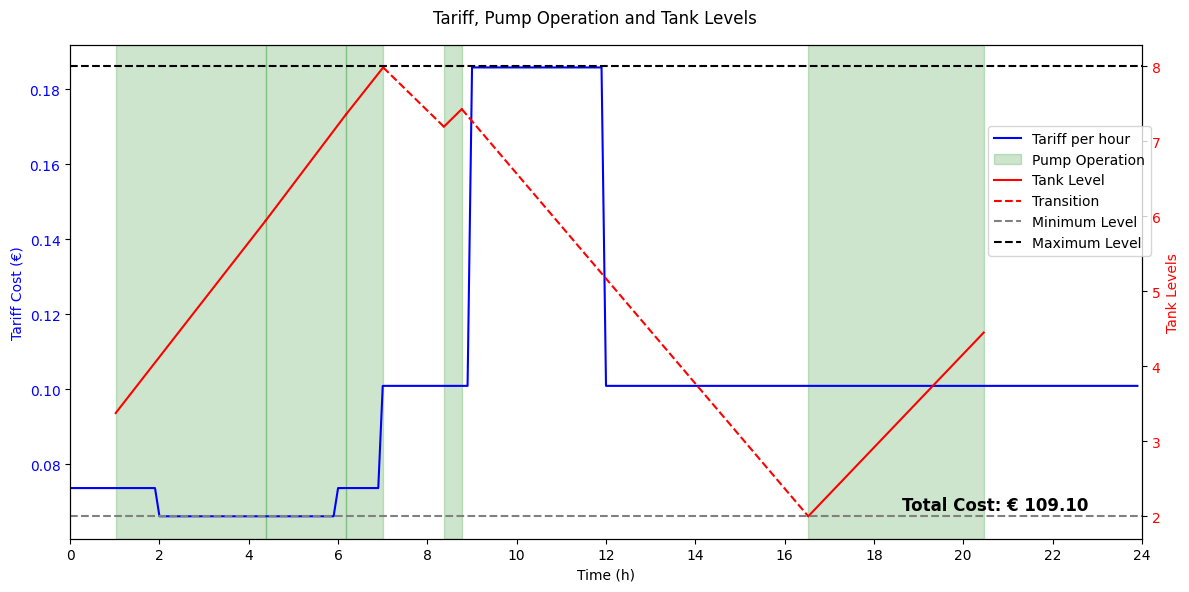

tensor([[ 1.0200,  4.3800,  6.1800,  8.3700, 16.5300,  3.3600,  1.8000,  0.8300,
          0.4000,  3.9300]])


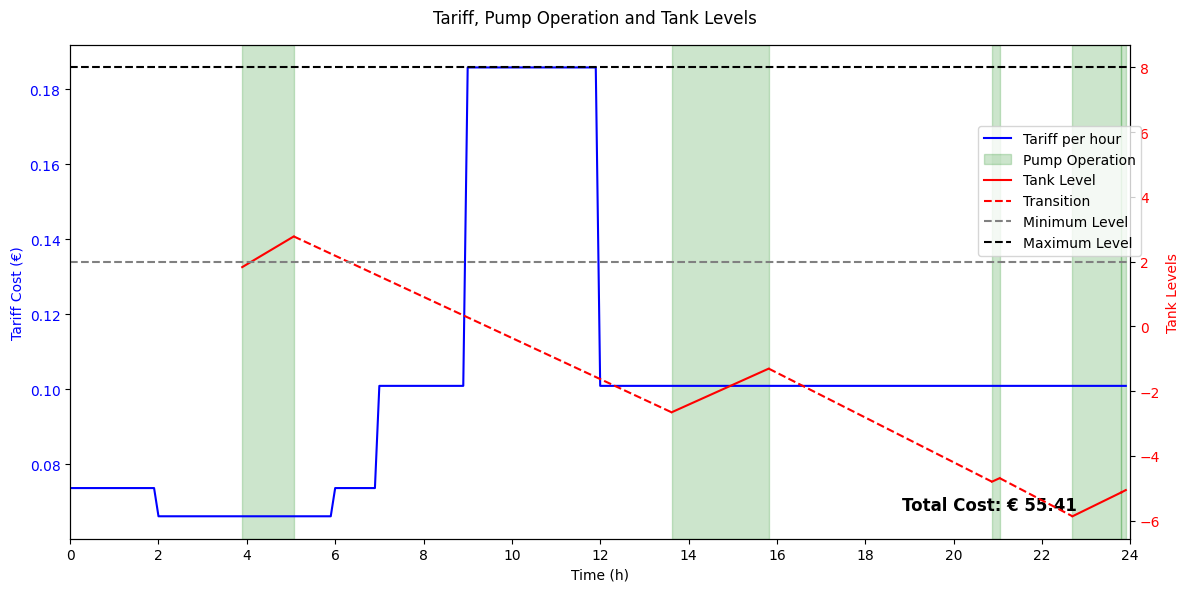

In [5]:
# OPT

input_data = torch.tensor([ [ 1.024e+00, 4.384e+00, 6.180e+00, 8.372e+00, 1.653e+01, 3.359e+00, 1.795e+00, 8.262e-01 , 4.026e-01, 3.927e+00]])
valores_formatados = torch.round(input_data * 100) / 100

total_cost_opt = data.obj_fn(input_data)[0]

gt_opt = data.gT(input_data, input_data)
plot_nivel_tanque(valores_formatados[0], gt_opt, total_cost_opt, args)
print(valores_formatados)

##########################################################################

output_data_ = torch.tensor(output_data[0], dtype=torch.float32).unsqueeze(0)  # Adiciona dimensão de batch
total_cost = data.obj_fn(output_data_)[0]

# gT espera um batch, então passamos output_data_ duas vezes
gt = data.gT(output_data_, output_data_)

# Plot
plot_nivel_tanque(output_data_[0], gt, total_cost, args)




